<a href="https://colab.research.google.com/github/Prathama-1/Internship-projects/blob/main/Sales_Forecasting_for_Furniture_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('Super_Store_data.csv',encoding='latin1')
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [ ]:
dataset.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [ ]:
set(dataset['Category'])

{'Furniture'}

In [ ]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City',
        'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity',
        'Discount', 'Profit']
dataset.drop(cols, axis=1, inplace=True)

In [ ]:
dataset.sort_values('Order Date')
dataset.isna().sum()

Order Date    0
Sales         0
dtype: int64

In [ ]:
f = dataset.groupby('Order Date')['Sales'].sum().reset_index()
f.head()

,Order Date,Sales
0,1/1/2017,975.490
1,1/10/2014,51.940
2,1/10/2015,1018.104
3,1/10/2016,104.770
4,1/11/2014,9.940


In [ ]:
f = f.set_index('Order Date')
f.index
#furniture = furniture.apply(lambda x: x.set_index('Order Date'))

Index(['1/1/2017', '1/10/2014', '1/10/2015', '1/10/2016', '1/11/2014',
       '1/11/2016', '1/12/2017', '1/13/2014', '1/13/2015', '1/13/2017',
       ...
       '9/7/2014', '9/7/2015', '9/7/2017', '9/8/2014', '9/8/2015', '9/8/2016',
       '9/8/2017', '9/9/2014', '9/9/2016', '9/9/2017'],
      dtype='object', name='Order Date', length=889)

In [ ]:
index_type = f.index.dtype
print(index_type)

object


In [ ]:
if index_type != 'datetime64[ns]':
    f.index = pd.to_datetime(f.index)

In [ ]:
y = f['Sales'].resample('MS').mean()
# resample is used to change the frequency of the datset.The argument 'MS' stands for 'month start',
#indicating that the data will be resampled to the start of each month. This means that the daily sales data will be aggregated and summarized by month.

In [ ]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

<Axes: xlabel='Order Date'>

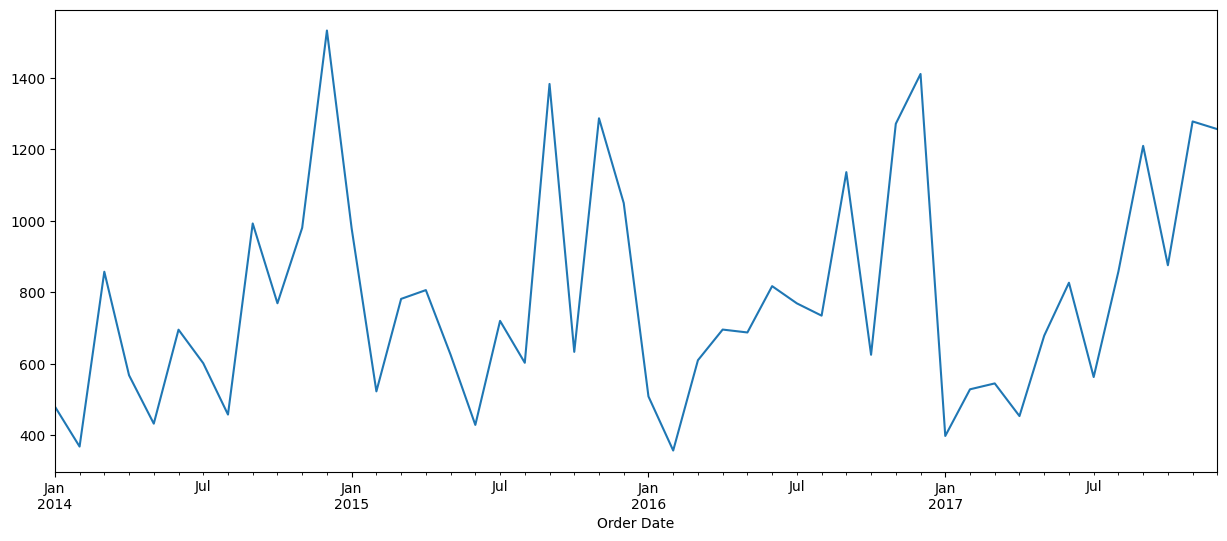

In [ ]:
y.plot(figsize=(15, 6))

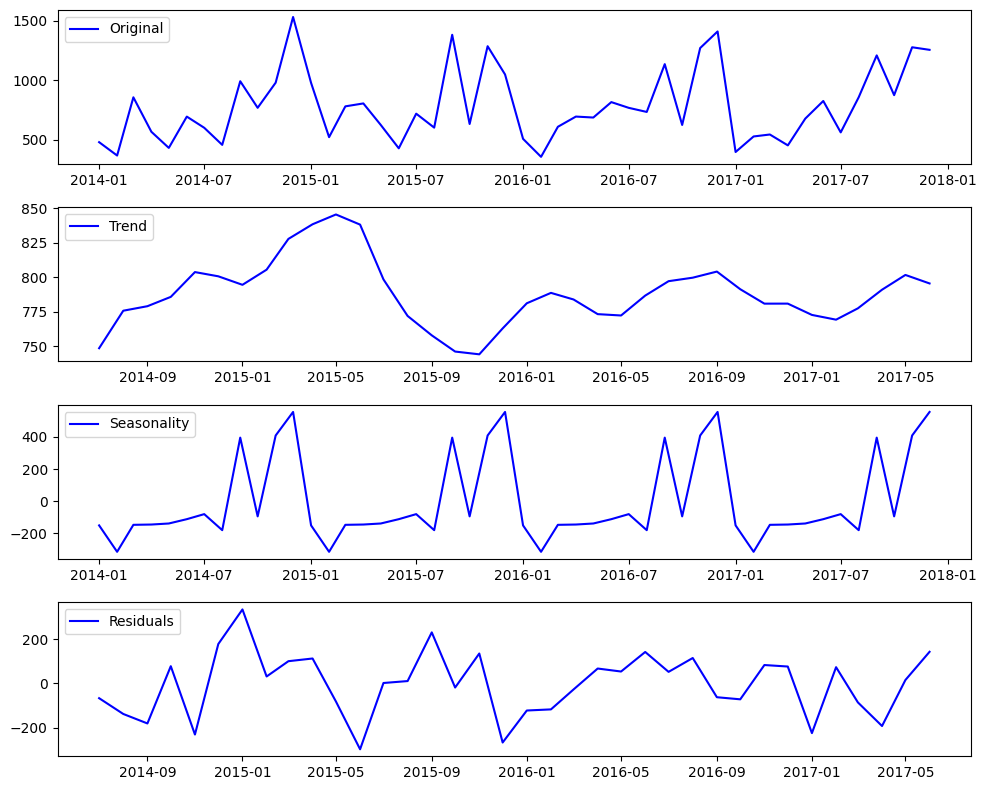

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(y, model='additive', period=12)  # Adjust period as needed
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 8))
plt.subplot(4,1,1)
plt.plot(y, label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(4,1,2)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.subplot(4,1,3)
plt.plot(seasonal, label='Seasonality', color='blue')
plt.legend(loc='upper left')
plt.subplot(4,1,4)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  2121 non-null   object 
 1   Sales       2121 non-null   float64
dtypes: float64(1), object(1)
memory usage: 33.3+ KB


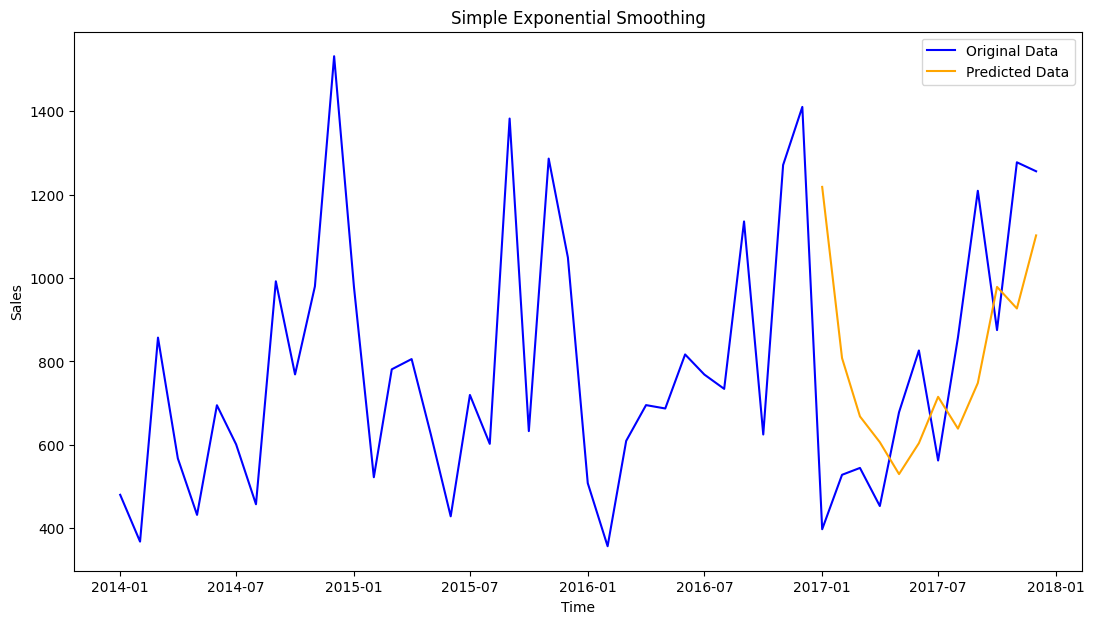

In [ ]:
 #SIMPLE EXPONENTIAL SMOOTHING

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(y)
model_fit = model.fit(smoothing_level=0.5, optimized=False)
#Smoothing level:It specifies the weight given to the most recent observation when updating the level.

# Make predictions
y_pred = model_fit.predict(start=pd.to_datetime('2017-01-01'), end=pd.to_datetime('2017-12-01'))

# Plot the original data and the predictions
plt.figure(figsize=(13,7))
plt.plot(y, label='Original Data', color='blue')
plt.plot(y_pred, label='Predicted Data', color='orange')
plt.title('Simple Exponential Smoothing')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()


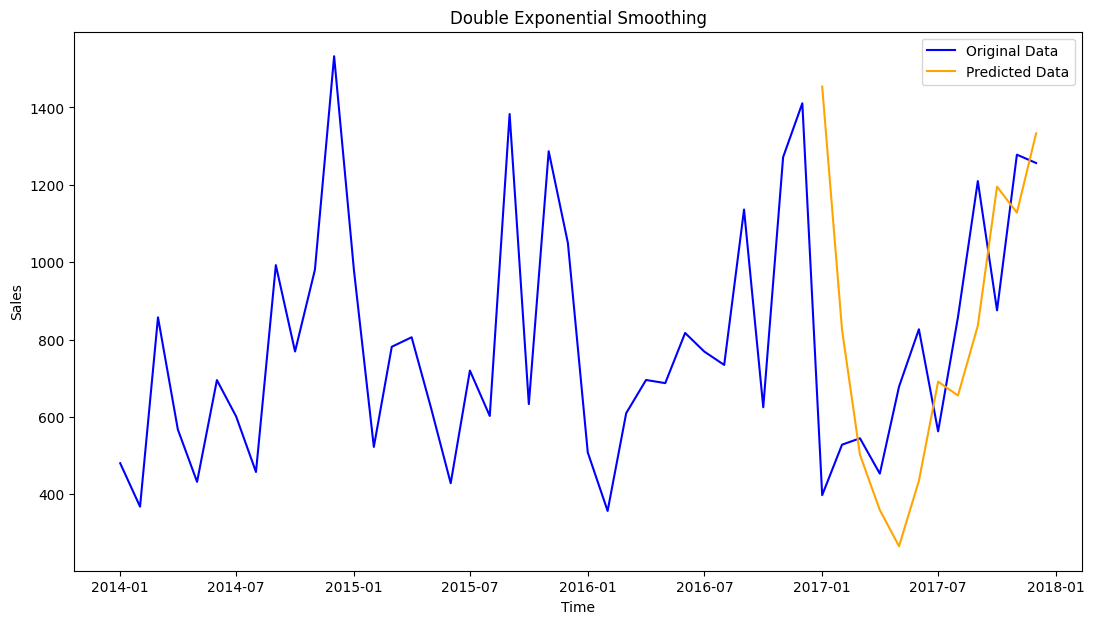

In [ ]:
# DOUBLE EXPONENTIAL SMOOTHING OR HOLT METHOD

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt

model = Holt(y)
model_fit = model.fit(smoothing_level=0.5, smoothing_trend=0.5, optimized=False)
#Smoothing level:It specifies the weight given to the most recent observation when updating the level.
#Smoothing trend:Similar to smoothing_level, a smaller value of smoothing_trend gives less weight to recent trend estimates, resulting in a smoother trend component.

# Make predictions
y_pred = model_fit.predict(start=pd.to_datetime('2017-01-01'), end=pd.to_datetime('2017-12-01'))

# Plot the original data and the predictions
plt.figure(figsize=(13,7))
plt.plot(y, label='Original Data', color='blue')
plt.plot(y_pred, label='Predicted Data', color='orange')
plt.title('Double Exponential Smoothing')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:
#SARIMAX (seasonal ARIMAX)
import itertools
import statsmodels.api as sm
p=d=q=range(0,1)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2], 12) for x in pdq]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order = param, seasonal_order = param_seasonal ,
                                            enforce_stationarity= False , enforce_invertibility= False )
            results = mod.fit()

            print('ARIMA{} x {} 12 -- AIC : {}'.format(param, param_seasonal, results.aic))

        except:
             continue
#The Akaike Information Criterion (AIC) is a measure used for model selection,
#especially in the context of statistical modeling and time series analysis.
#It provides a way to compare the goodness of fit of different models relative
# to each other, taking into account the trade-off between the complexity of the
#model and its ability to explain the data.

#The AIC quantifies the amount of information lost by a given model when approximating
# the true underlying process that generated the data.
#It penalizes models for having more parameters, favoring simpler models that
#still provide a good fit to the data.

ARIMA(0, 0, 0) x (0, 0, 0, 12) 12 -- AIC : 769.0817523205915


In [ ]:
#BEST MODEL:ARIMA(0, 0, 0) x(0, 0, 0, 12)  12 -- AIC : 279.5806233397717
mod = sm.tsa.statespace.SARIMAX(y,
                               order=(0,0,0),
                               seasonal_order= (0,0,0,12),
                               enforce_stationarity = False,
                               enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       7.17e+05   2.71e+05      2.648      0.008    1.86e+05    1.25e+06


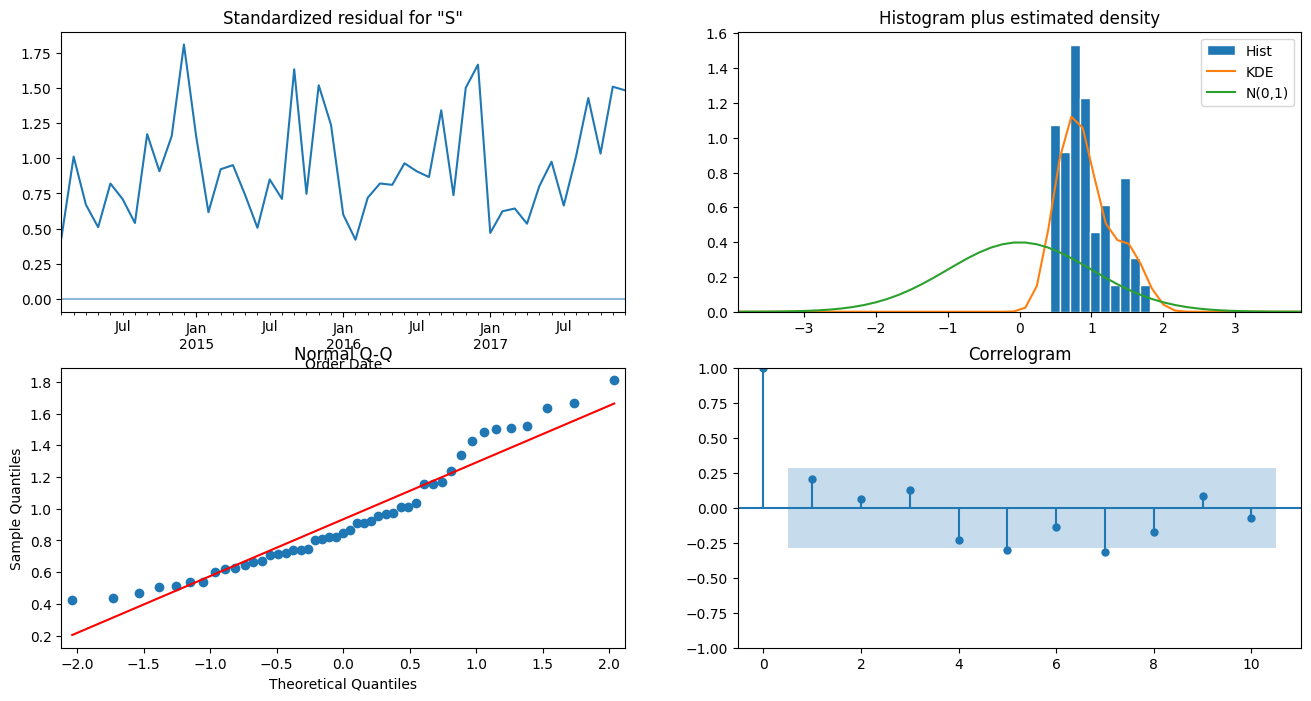

In [ ]:
#visualization
results.plot_diagnostics(figsize=(16,8))
plt.show()